<a href="https://colab.research.google.com/github/AldoSilva07/Grupo-4---M-dulo-de-Python/blob/main/C%C3%B3digo_Grupo_4_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando bibliotecas para tratamento de dados**

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Importando e tratando o arquivo .csv**

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/AldoSilva07/Grupo-4---M-dulo-de-Python/refs/heads/main/Table%203-1.csv") #Fazer importação do Github

# Tratamento dos dados

df_clean_lines = df.dropna(thresh=len(df.columns) - 2) # Remove linhas com mais de 2 valores NaN

df_clean = df_clean_lines.drop('Table 3-1:  CO2, CH4, and N2O Emissions from Energy (MMT CO2 Eq.)', axis=1) #Remove coluna vazia

df_clean.columns = df_clean.iloc[0]  # Define os nomes das colunas como sendo a primeira linha

df_clean = df_clean[1:].reset_index(drop=True)  # Remover a linha usada para os nomes e resetar o índice

df_clean.index = df_clean.iloc[:, 0] # Define os nomes das linhas como sendo a primeira coluna

df_clean = df_clean.iloc[:, 1:]  # Remove a primeira coluna

df_clean = df_clean.drop(index="Incineration of Waste", errors='ignore')

# Remover espaços extras e converter para float
df_clean = df_clean.apply(lambda x: x.str.replace(',', '').str.strip() if x.dtype == "object" else x)

df_clean = df_clean.apply(pd.to_numeric, errors='coerce')  # Converte para numérico


display(df_clean)

#print(df_clean.dtypes)  # Verifica os tipos das colunas

1,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Gas/Source,,,,,,,,,,,,,,,,,,,,,
CO2,4908.8,4867.4,4969.8,5086.1,5171.1,5227.1,5412.4,5484.8,5527.8,5603.3,...,5932.5,5847.3,5924.0,5740.5,5347.1,5520.0,5386.6,5179.7,5330.8,5377.9
Fossil Fuel Combustion,4740.7,4690.3,4793.2,4915.3,4990.0,5041.2,5232.8,5297.1,5333.7,5401.3,...,5747.1,5660.6,5751.2,5566.7,5193.5,5358.3,5227.7,5024.7,5157.6,5208.2
Electricity Generation,1820.8,1818.2,1831.5,1906.9,1931.2,1947.9,2021.0,2088.4,2177.4,2190.5,...,2400.9,2345.3,2411.9,2360.1,2145.7,2258.4,2157.7,2022.2,2038.1,2039.3
Transportation,1493.8,1447.6,1496.9,1532.4,1577.0,1609.9,1654.3,1670.1,1706.6,1761.1,...,1887.0,1882.6,1886.1,1791.8,1717.0,1728.3,1707.6,1696.8,1713.0,1737.6
Industrial,842.5,822.5,857.4,855.7,864.8,870.5,907.4,906.8,869.1,845.9,...,828.0,852.6,847.9,802.8,727.7,775.5,773.3,782.9,812.2,813.3
Residential,338.3,347.2,353.5,365.8,356.8,352.8,383.1,364.7,331.2,350.6,...,357.8,321.3,341.3,347.6,336.3,334.6,326.8,282.5,329.7,345.1
Commercial,217.4,223.3,220.6,220.1,222.4,225.6,234.5,233.6,215.9,218.8,...,223.5,208.6,218.8,223.6,223.5,220.1,220.7,196.7,221.0,231.9
U.S. Territories,27.9,31.6,33.3,34.4,37.8,34.5,32.6,33.4,33.4,34.5,...,49.9,50.2,45.1,40.8,43.5,41.4,41.5,43.6,43.5,41.0
Non-Energy Use of Fuels,118.1,127.6,125.9,116.4,125.5,128.3,123.8,132.3,149.7,156.3,...,138.9,140.1,125.2,125.3,106.2,114.1,108.5,105.6,121.7,114.3


# **Análise dos dados**

**Emissão de CO2 ao longo dos anos**

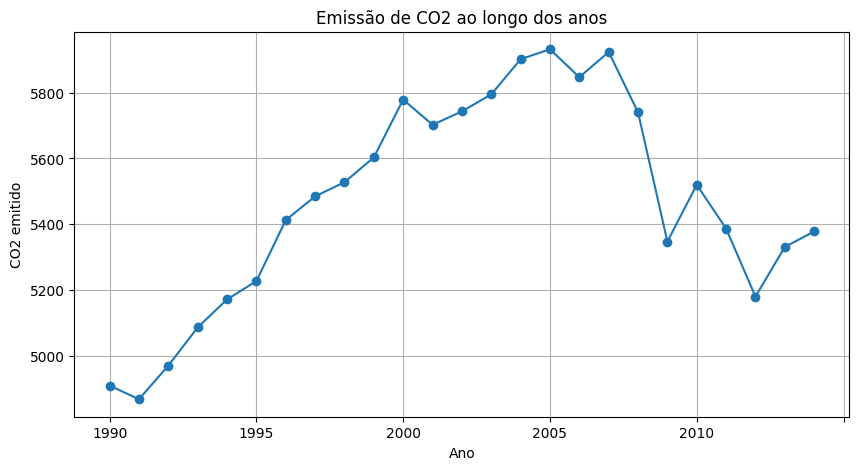

In [ ]:
df_clean.loc["CO2"].plot(figsize=(10,5), marker='o', title="Emissão de CO2 ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("CO2 emitido")
plt.grid()
plt.show()

**Emissões totais - Sérgio**

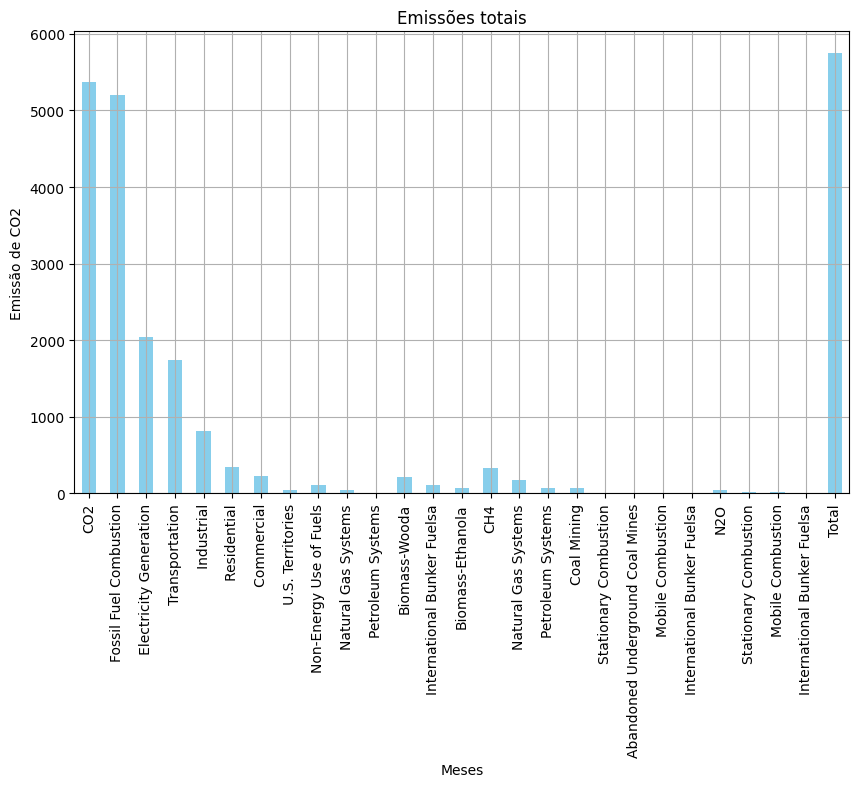

In [ ]:
df_2014 = df_clean["2014"]

df_2014.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Emissões totais")

# Ajustar os rótulos dos eixos
plt.xlabel("Meses")  # Ou outra variável no eixo X, como 'categorias', por exemplo
plt.ylabel("Emissão de CO2")

# Adicionar uma grade para o gráfico
plt.grid(True)

# Exibir o gráfico
plt.show()

In [ ]:
#df_numeric = df_clean.select_dtypes(include=['number'])

#sns.pairplot(df_numeric)
#plt.show()

#sns.heatmap(df_numeric.corr(), cmap='Wistia', annot=True)
#plt.show()

**Previsão e comparação de dados**
---
Importando dados do PIB mundial e filtrando por local e período.



<ipython-input-43-5b79d6cef8ea>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_selected.rename(index={df_usa_selected.index[0]: "PIB"}, inplace=True)
<ipython-input-43-5b79d6cef8ea>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_selected_future.rename(index={df_usa_selected_future.index[0]: "PIB"}, inplace=True)


R² da Regressão Linear: 0.0
MSE da Regressão Linear: 30029792.911599997
R² do Random Forest: 0.0
MSE do Random Forest: 30029792.91159998


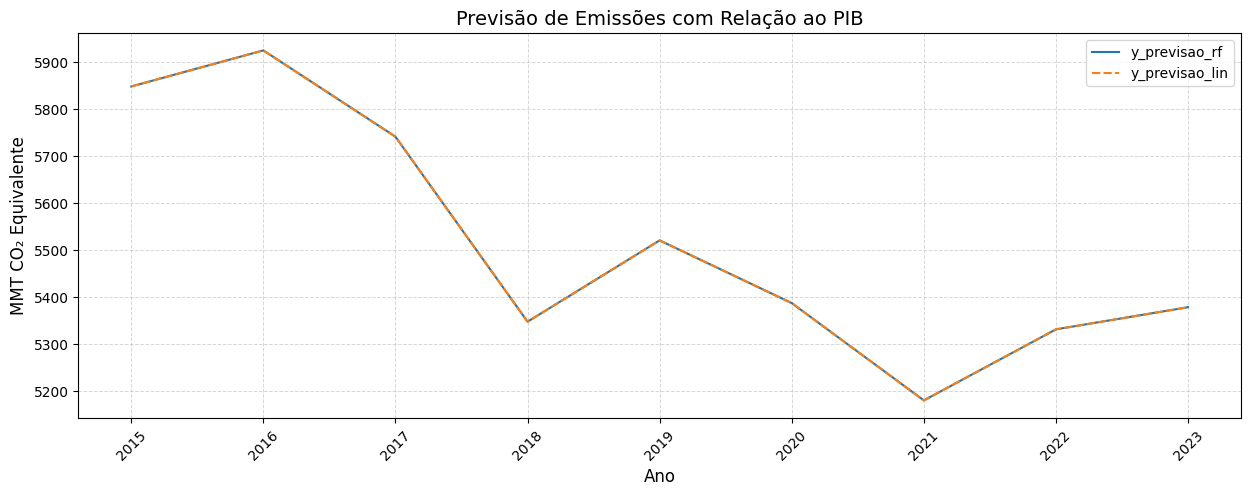

In [43]:
df_gdp = pd.read_csv("https://raw.githubusercontent.com/AldoSilva07/Grupo-4---M-dulo-de-Python/refs/heads/main/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_76269.csv", sep=',', skiprows=4) #Fazer importação do Github


# Filtrar a linha referente aos EUA
df_usa = df_gdp[df_gdp["Country Code"] == "USA"]

# Selecionar apenas as colunas dos anos entre 1990 e 2014, para treinar a máquina
years = [str(year) for year in range(1990, 2015)]
df_usa_selected = df_usa[years]

# Corrige o rótulo dos dados
df_usa_selected.rename(index={df_usa_selected.index[0]: "PIB"}, inplace=True)

# Selecionar apenas as colunas dos anos entre 1999 e 2023
years = [str(year) for year in range(1999, 2024)]
df_usa_selected_future = df_usa[years]

# Corrige o rótulo dos dados
df_usa_selected_future.rename(index={df_usa_selected_future.index[0]: "PIB"}, inplace=True)
teste_predicao_pib = df_usa_selected_future.values

# Exibir os dados filtrados
treinos_predicao_pib = df_usa_selected.values

treinos_predicao_co2 = df_clean.values[0]
treinos_predicao_co2 = treinos_predicao_co2.reshape(1, -1)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

y_test = np.zeros(25) # Para armazenar os dados de saida da simulação

# treino AI
lin_reg = LinearRegression()
lin_reg.fit(treinos_predicao_pib, treinos_predicao_co2)

rf_reg = RandomForestRegressor()
rf_reg.fit(treinos_predicao_pib, treinos_predicao_co2)

# teste AI

test_pred_lin = lin_reg.predict(teste_predicao_pib)
test_pred_rf = rf_reg.predict(teste_predicao_pib)

test_pred_lin = test_pred_lin.flatten()
test_pred_rf = test_pred_rf.flatten()

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

# Gerando gráfico da previsão das emissões de CO2 em função do PIB
x_labels = list(range(1999, 2024))
df_resultado.index = x_labels
df_resultado = df_resultado.loc[2015:]
plt.figure(figsize=(15, 5))
# Criar o gráfico de linha
sns.lineplot(data=df_resultado)
plt.title("Previsão de Emissões com Relação ao PIB", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("MMT CO₂ Equivalente", fontsize=12)
plt.xticks(ticks=x_labels, labels=x_labels, rotation=45)  # Rotação para melhor leitura
plt.grid(True, linestyle="--", alpha=0.5, linewidth=0.7)
plt.show()